# Lecture 6

## Combining Data


## Outline
* Concatenate
* Time-Series
* Join and Merge


## Data in (many) similar files

<br/>
<div class="image-txt-container">
  
<img src="imgs/many_files.png" width="50%">


* Storage considerations?
* Collected over time?
* *How do we combine them?*

</div>



### Row-wise combination of data:  `concat`




<br/>
<div class="image-txt-container">

* `pd.concat` combines DataFrame and Series objects.
* By default, the rows of objects are stacked.
* `concat` has many options; we'll learning them slowly.

<img src="imgs/merging_append3.png" width="70%">


</div>


### How to implement appending of rows? (Roughly)

* Assuming columns match 1-to-1, in same order.
* Assume we have a `list_of_tables` to combine row-wise.
```
out = []
for tbl in list_of_tables:
    for row in tbl:
        out = out + [row]
```

* How would you adapt to columns with different orders?

### `pd.concat` by example
* The `pd.concat` function concatenates DataFrames (stacks them).
* By, default, `pd.concat` stacks DataFrames row-wise.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Create a first DataFrame

d = {
    'Name':['Marina','Aaron','Max','Cathy'],
    'Grade1':[76, 45, 89, 71],
    'Grade2':[64, 67, 85, 93],
    }
 
class_1 = pd.DataFrame(d)
class_1

In [ ]:
# Create a second DataFrame

d = {
    'Name':['Emily','Rob','Zoe'],
    'Grade1':[87, 56, 25],
    'Grade2':[76, 23, 67],
    }
 
class_2 = pd.DataFrame(d)
class_2

In [ ]:
# Lets concatenate two dataframes df1 and df2

pd.concat([class_1,class_2])

In [ ]:
# what would you want to change about table?

combined = pd.concat([class_1,class_2], ignore_index = True)
combined

In [ ]:
# we can set the key for each concatenated table:

combined = pd.concat([class_1,class_2], keys = ["Class 1", "Class 2"])
#combined.reset_index()
combined

In [ ]:
# how to use it: 

#combined.loc["Class 1"]   # gives dataframe
combined.loc["Class 1"].loc[0]   # first row


## Common Combination: time series

* Data is often partitioned by time: e.g. there may be one `csv` file per day for 1 year.
    - `concat` the different dataframes, perhaps using information about the day.

The data types of Time series are:
* `Timestamps` reference particular moments in time (e.g., Sat 8th, 2019 at 3:00pm).
    - reference to particular moment in time
    - It stored internally as a number of seconds from January 1st 1970
    - Stored in the optimized way, faster than Python `datetime` object
* `Time deltas` or durations reference an exact length of time (e.g., a duration of 3 hours).

### Time Series in `Pandas`

* `pd.to_datetime` converts strings to timestamps.
* Timestamps have time-related attributes (`dayofweek`, `hour/min/sec`).
* Subtracting timestamps yield time-delta objects.

In [ ]:
final_start = pd.to_datetime("8th of June, 2019, 3pm")
final_start

In [ ]:
final_finish = pd.to_datetime("8th of June, 2019, 5:59pm")
final_finish

In [ ]:
pd.to_datetime('02-03-2019 13:25:01')

In [ ]:
# useful attributes
final_finish.dayofweek

In [ ]:
final_finish.year

In [ ]:
final_finish - final_start

### Question: 

In the tables of student grades, who finished exam the fasted among all students in a class?

Approach:
1. Concatenate both tables
2. Convert columns to datetime objects
3. Find the difference between finish and start (time deltas)
4. Sort 
5. Pick the fastest exam taker


In [ ]:
final_v1 = pd.DataFrame( {"name": ["Marina", "Max", "Robert"],
                        "start_exam": ["15:00", "15:02", "15:01"],
                        "finish_exam": ["16:00", "17:58", "17:05"]}
)
final_v1

In [ ]:
final_v2 = pd.DataFrame( {"name": ["Martha", "Justin", "Tom"],
                        "start_exam": ["18:00", "18:06", "19:07"],
                        "finish_exam": ["20:00", "20:50", "20:59"]}
)
final_v2

In [ ]:
#1.

both_versions = pd.concat([final_v1,final_v2])
both_versions

In [ ]:
#2.

both_versions = both_versions.assign(
    start_exam=pd.to_datetime(both_versions["start_exam"]), # can take a series 
    finish_exam=pd.to_datetime(both_versions["finish_exam"])
)

both_versions.info()

In [ ]:
#3.

both_versions = both_versions.assign(
    elapsed= both_versions["finish_exam"] - both_versions["start_exam"]
)

both_versions
# what is strange about start and finish after parsing?

In [ ]:
#4.

both_versions.sort_values("elapsed").iloc[0].loc["name"]


## Related data; different measurements

<br/>
<div class="image-txt-container">
  
<img src="imgs/two_tables.jpg" width="100%">

<div></div>


* Same individuals; different attributes.
* Collected for different purposes.
* *How do we combine them?*

</div>



### What if our grades were in separate tables?

* Can we create a single table with all grades?
* Try `concat`!


In [ ]:
# add another dataframe as a column(s)

d = {
    'Name':['Marina','Aaron','Max','Cathy'],
    'Grade1':[76, 45, 89, 71],
    }
 
new_class_1 = pd.DataFrame(d)
display(new_class_1)


d = {
    'Name':['Marina','Aaron','Max','Cathy'],
    'Grade2':[54, 65, 23, 87],
    }
 
new_class_2 = pd.DataFrame(d)
display(new_class_2)

In [ ]:
# if you simply use pd.concat([df1, df2]), what will you get?

pd.concat([new_class_1, new_class_2], sort = False)

In [ ]:
# argument axis comes to rescue

pd.concat([new_class_1, new_class_2], axis = 1)


### Column-wise combination of data:  `concat` 


<br/>
<div class="image-txt-container">
    
    
<div></div>
    
* Joining different measurements of the same observations.
* Argument `axis=1` specifies column-wise.
* Joining is done by matching indices

<img src="imgs/merging_concat_series_ignore_index.png">
</div>

In [ ]:
# the data is almost never perfect:

display(new_class_1)


d = {
    'Name':['Cathy','Max'],
    'Grade2':[87, 23],
    }
 
short_class = pd.DataFrame(d)
display(short_class)

In [ ]:
pd.concat([new_class_1, short_class], axis = 1)

In [ ]:
# to fix that we can use index while creating a data frame

d = {
    'Name':['Marina','Aaron','Max','Cathy'],
    'Grade1':[76, 45, 89, 71]
    }
 
class_1_index = pd.DataFrame(d, index = [0, 1, 2, 3])  # <--- index
display(class_1_index)


d = {
    'Name':['Cathy','Max'],
    'Grade2':[87, 23]
    }
 
class_2_index = pd.DataFrame(d,  index = [3, 2])   # <--- index
display(class_2_index)

pd.concat([class_1_index, class_2_index], axis = 1)

In [ ]:
# use a useful index
pd.concat([new_class_1.set_index('Name')])

In [ ]:
# Set index appropriately and concat
pd.concat([new_class_1.set_index('Name'), short_class.set_index('Name')], axis=1, sort = False)

### `concat` observations

* `concat` combines lists of dataframes row/column-wise using `axis` keyword
* Columns are matched via index; Rows are matched via columns.
* Set `ignore_index=True` to match by row number (faster).

**shortcomings**
* Must take care of your indices for matching,
* Displays duplicate columns.

## Column-wise combination of data, revisted

* **`concat`, `join`, and `merge`**


<br/>
<div class="image-txt-container">
    
    
<div></div>

* A **join** combines: 
    - the columns from two tables 
    - to create a new table

* Combine two kinds of information:
    - about the same entity,
    - linked by a common feature/column
* The common column is the **join key**
* Example join by a common column (1-to-1 join):


<img src="imgs/join.png" width="50%">

</div>





## Joining columns: Pandas `merge`


* `merge` joins tables by columns or indexes.
* 'merges' columns in common, by default


In [ ]:
# Creating small dataframes

d = {
    'City':['San Diego','Moscow', 'Rome'],
    'Temp':[76, 28, 56],
    }
 
df1 = pd.DataFrame(d)


d = {
    'City':['San Diego','Moscow', 'Shanghai'],
    'Wind speed':[3, 11, 7],
    }
 
df2 = pd.DataFrame(d)

display(df1)
display(df2)

In [ ]:
# what the common columns are
# Rome and Shanghai is missing since not in both tables
df3 = df1.merge(df2)

display(df3)

## Join types: inner joins

<br/>
<div class="image-txt-container">
<div></div>

* `Rome` and `Shanghai` does not show up in the merged table! 
* Why? because there is:
    - no city `Rome` in the second table and 
    - no city `Shanghai` in the first table. 
* 'Inner joins' represent the `intersection` of two tables.


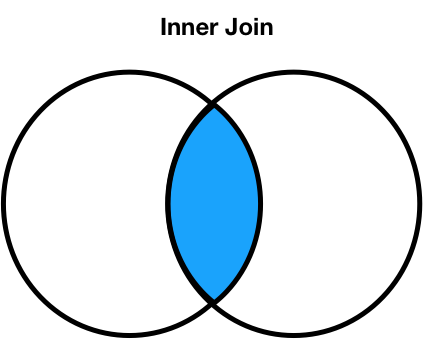

</div>




## Different join types handle mismatches differently


<br/>
<div class="image-txt-container">
<div></div>

* Inner: keep *only* matched keys.
* Outer: keep all non-matched keys.
* Left: keep non-matched keys in left table.
* Right: keep non-matched keys in right table.

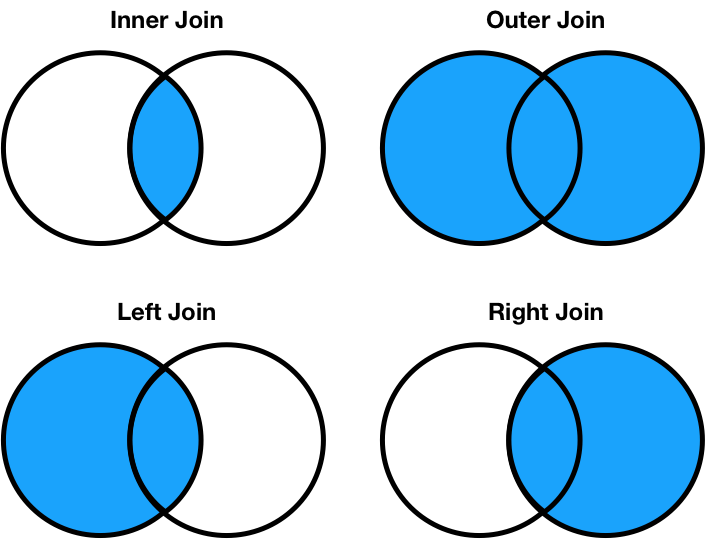

</div>




In [ ]:
# union 

df3_outer = pd.merge(df1, df2, how = "outer")
df3_outer

# what happens to the missing fields? Replaced with NaN

In [ ]:
# left join. Predict the output. How many columns? How many rows?

display(df1)
display(df2)

df3_left  = pd.merge(df1, df2, how = "left")
df3_left

In [ ]:
# Right join. What is the output?

df3_right  = pd.merge(df1, df2, on ="City", how = "right")
df3_right

In [ ]:
# What if your tables have more than one common column in your dataframes?

display(class_1)
display(class_2)

In [ ]:
# predict 

df3 = class_1.merge(class_2, how='left')
df3

### What if the tables share multiple columns
* Specify the name of the join column using the keyword `on`

In [ ]:
# let's merge on Name
# You can join on multiple columns: on = [Col_name1, col_name2, ...]

merged = class_1.merge(class_2, on = "Name", how = "outer")
merged

In [ ]:
# You can have more descriptive labels for columns using flag suffixes 

merged = class_1.merge(class_2, on = "Name", how = "outer", suffixes = ("_class1", "_class2"))
merged

In [ ]:
# What if the columns you want to join on have different labels?


d = {
    'City':['San Diego','Moscow', 'Rome'],
    'Temp':[76, 28, 56],
    }
 
df1 = pd.DataFrame(d)


d = {
    'city':['San Diego','Moscow', 'Shanghai'],
    'Wind speed':[3, 11, 7],
    }
 
df2 = pd.DataFrame(d)

display(df1)
display(df2)


In [ ]:
df1.merge(df2)

In [ ]:
merged = pd.merge(df1, df2, left_on = "City", right_on = "city") #, how = "outer")
display(merged)


## Basic joins conclusion

* Joining tables: Combining rows of multiple tables
* Outer join
    - Union of index sets (all labels, no repetition)
    - Missing fields filled with NaN
* Inner join
    - Intersection of index sets (only common labels)
* Left/Right Joins
    - Keep index set for left/right table
    - Missing fields filled with NaN

### How to implement joins? (roughly)

* Assume we want to join two tables `tbl1` and `tbl1` on a common column `key`
* Assume the join keys are distinct, in 1-to-1 correspondence.

```
tbl1.sort(by='key') # sort tables
tbl2.sort(by='key')
out = []
for i=1 ... len(tbl1)
    out = out + [tbl1.row(i) + tbl2.row(i)]
```

* How would it change if keys are not 1-to-1?

# Join method. FYI

* is a convenient method for combining the columns of two DataFrames.

* `pandas.merge()` is the underlying function used for all merge/join behavior.

## main differences between `df.join()` and `df.merge()`:

* lookup on right table: `df1.join(df2`) always joins via the index of `df2`, but `df1.merge(df2)` can join to one or more columns of `df2` (default) or to the index of` df2` (with `right_index=True`).


* lookup on left table: by default,` df1.join(df2)` uses the index of `df1` and `df1.merge(df2)` uses column(s) of `df1`. That can be overridden by specifying `df1.join(df2, on=key_or_keys`) or `df1.merge(df2, left_index=True)`.


* left vs inner join: `df1.join(df2)` does a left join by default (keeps all rows of `df1`), but `df.merge` does an inner join by default (returns only matching rows of `df1` and `df2`).



from here: https://stackoverflow.com/questions/22676081/what-is-the-difference-between-join-and-merge-in-pandas

## Many-to-one joins

Many-to-one joins are 
* joins where *one* of the DataFrames contains duplicate values of keys. 
* The resulting DataFrame will preserve those duplicate entries as appropriate. 

Consider the following example of a many-to-one join:

In [ ]:
faculty  = pd.DataFrame({'Faculty': ["Langlois", "Fraenkel", "Alvarado", "Voytek"],
                    'Department': ["DSC", "DSC", "CSE", "COGS"],
                    'Email':['L@ucsd', 'F@ucsd', "A@ucsd", "V@ucsd"]
                   })

display (faculty)

depts = pd.DataFrame({'Department': ["DSC", "CSE", "COGS", "BIOLOGY"],
                      'Chair':["Gupta", "Tullsen", "Kutas", "Kuffler"]})

display (depts)

In [ ]:
# Let's merge:

#result = pd.merge(faculty, depts)
result = faculty.merge(depts)
result

# The resulting DataFrame has an aditional column 
# with the "Chair" information, where the information is repeated 
# in one or more locations as required by the inputs.

## Many-to-many joins

Many-to-many joins are
* joins where *neither* DataFrames have unique join keys.

Consider the following example:

In [ ]:
faculty  = pd.DataFrame({'Faculty': ["Langlois", "Fraenkel", "Alvarado", "Voytek"],
                    'Department': ["DSC", "DSC", "CSE", "COGS"],
                    'Email':['L@ucsd', 'F@ucsd', "A@ucsd", "V@ucsd"]
                   })

display (faculty)



depts_help = pd.DataFrame({'Department': ["DSC", "DSC", "CSE", "CSE", "COGS", "COGS", "BIOLOGY"],
                      'HelpStaff':["Margaret", "Meaghan", "Nick", "Esra", "Daniela", "Courtney", "Scott"]})

display (depts_help)

In [ ]:
# predict the size of the merge


result = pd.merge(faculty, depts_help)
result

## Example: SDPD Vehicle Stops

In [ ]:
!ls *.csv

In [ ]:
import glob

# glob: pattern mathcing


file_list = glob.glob('stops_20*.csv')
print(file_list)

In [ ]:
df1 = pd.read_csv(file_list[0])
df1.head(5)

df2 = pd.read_csv(file_list[1])
df2.head(5)

#read_list = [pd.read_csv(i) for i in file_list]
#read_list

In [ ]:
# Example of concat and merge

stops = pd.concat([df1, df2], ignore_index=True)
stops.head(5)

In [ ]:
len(stops)

In [ ]:
# how many races?
# break down by race of traffic stops
# empirical distribution

stops["subject_race"].value_counts(normalize=True).to_frame()


In [ ]:
# race codes

races = pd.read_csv("race_codes.csv")
races

In [ ]:
# Join the descriptions of the proportions.
# Is the join 1-1?
# Are the proportions what you expect?

race_percentages = stops["subject_race"].value_counts(normalize=True).rename('proportion').to_frame()

race_percentages.merge(races, left_index=True, right_on = "Race Code")

# Goal: 

* The different race codes have different granularities.
* Can we clean this?

<img src="imgs/goal.png" width="50%">


In [ ]:
race_dict = {'A':'Asian',
             'B':'Black',
             'C':'Asian',
             'D':'Asian',
             'F':'Asian',
             'G':'Asian',
             'H':'Hispanic',
             'I':'American Indian',
             'J':'Asian',
             'K':'Asian',
             'L':'Asian',
             'O':'OTHER',
             'P':'Asian',
             'S':'Asian',
             'U':'Hawaiian',
             'V':'Asian',
             'W':'White',
             'Z':'Asian'
            }

In [ ]:
# We could create a series/table and merge (join) to the original data

pd.Series(race_dict, name = "races").to_frame().merge(stops, left_index = True, right_on = 'subject_race')

# ^^ sorting for each table

In [ ]:
races['Race_Category'] = races.apply(lambda row: race_dict[row["Race Code"]], axis=1)
races

In [ ]:
stops.head(5)

Let's stop and think what merge is more appropriate there? 

In [ ]:
stops.subject_race.isnull().mean()

In [ ]:
stops = pd.merge(stops, races, how = 'left', left_on = "subject_race", right_on = "Race Code")
stops.head(5)

In [ ]:
# Proportions of stops for each ethnicity
stops["Race_Category"].value_counts(normalize=True).to_frame()

## Hash Joins / Broadcast Joins
* Joins require sorting; sorting is expensive for large data.
* Can we join without sorting?
    - if *one* table is small!
* Load one dataframe into a dictionary; iterate through rows of the big table, applying dictionary.

In [ ]:
# illustrate with the race descriptions
race_dict = races.set_index('Race Code').loc[:, 'Description'].to_dict()

stops['Description'] = stops['subject_race'].apply(lambda x:race_dict.get(x, np.NaN))
stops['Description'].head()